$\textbf{Beispiel für Graphenschnitt (cut)} \\$
Wir wollen nun an folgendem Beispiel illustrieren, warum es beim Graphen-Clustering zu einfach ist, eine Partition $A, A^c$
zu wählen, die 
\begin{align} cut(A,A^c) = \sum_{\substack{i\in A, j \in A^c}} w_{ij} \end{align}
minimiert. 
Betrachten wir dazu folgenden gewichteten Graphen:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(0, 3, weight=0.25)

G.add_edge(1, 3, weight=0.25)
G.add_edge(1, 2, weight=0.3)
G.add_edge(2, 5, weight=0.25)
G.add_edge(2, 3, weight=0.3)
G.add_edge(3, 4, weight=0.3)
G.add_edge(3, 5, weight=0.2)
G.add_edge(4, 5, weight=0.5)
G.add_edge(4, 6, weight=0.15)
G.add_edge(4, 7, weight=0.15)
G.add_edge(6, 10, weight=0.4)
G.add_edge(6, 8, weight=0.4)
G.add_edge(6, 7, weight=0.4)
G.add_edge(7, 10, weight=0.3)
G.add_edge(8, 10, weight=0.3)
G.add_edge(8, 9, weight=0.4)
G.add_edge(9, 10, weight=0.3)


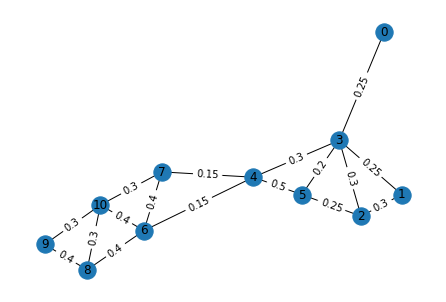

In [2]:
#Wir legen zum plotten feste Positionen fest
pos = nx.spring_layout(G, seed=70)

#Plotte Graphen
nx.draw(G,   node_size=300, with_labels = True, pos= pos,)
labels = nx.get_edge_attributes(G,'weight')
edge_labels= nx.draw_networkx_edge_labels(G,pos= pos, edge_labels=labels)


Wenn wir den Graphen mit dem Auge clustern würden, würde fast jeder vermutlich den Graphen intuitiv folgendermaßen
teilen:
    

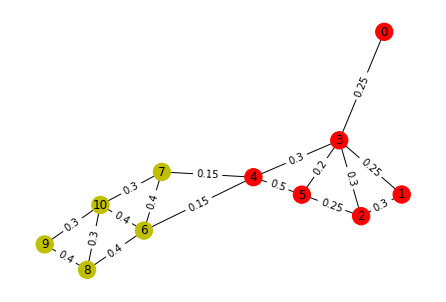

In [3]:
nx.draw(G, pos, node_color=['r','r','r','r','r','r','y','y','y','y','y'], node_size=300, with_labels = True)
edge_labels= nx.draw_networkx_edge_labels(G,pos = pos, edge_labels=labels)

Wenn wir nun aber als Partiotion $A,A^c$ der Knotenmenge $V$ jene nehmen, welche $cut(A,A^c)$ minimiert, erhalten wir 
$A = \{0\}$ und $A^c = \{1,2,...,10 \}$ mit $cut(A,A^c) = 0.25$.

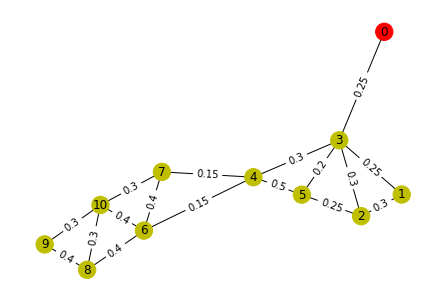

In [4]:
nx.draw(G, pos, node_color=['r','y','y','y','y','y','y','y','y','y','y'], node_size=300, with_labels = True)
edge_labels= nx.draw_networkx_edge_labels(G,pos = pos, edge_labels=labels)

Der minimale Schnitt wird hier also durch die Abspaltung eines einzelnen Knoten
erreicht. Dies ist natürlich nicht das Ergebnis, welches wir uns beim Clustern, bei
dem wir einigermaßen ähnliche Gruppen identifizieren wollen, erhoffen. Deshalb betrachten wir in der Arbeit den normalisierten Schnitt.

Nun speichern wir die Ergebnisse in einem großem Plot ab, um diese in der Arbeit zu verwenden. Dieser Plot entspricht Abbildung 3 aus der Arbeit.

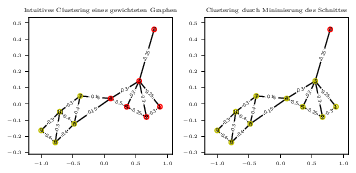

In [11]:
import matplotlib

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})






fig_1 =plt.figure(figsize=(15, 5))


ax= plt.subplot(1,2,1)
nx.draw(G, pos, node_color=['r','r','r','r','r','r','y','y','y','y','y'], node_size=20, with_labels = True, font_size= 6)
edge_labels= nx.draw_networkx_edge_labels(G,pos = pos, edge_labels=labels, font_size= 5)
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, labelsize= 4)
ax.set_title(' Intuitives Clustering eines gewichteten Graphen',  fontsize=6)
ax.tick_params( labelsize= 4)




ax= plt.subplot(1,2,2)
nx.draw(G, pos,node_color=['r','y','y', 'y', 'y','y','y','y','y','y','y'] , node_size=20, with_labels = True, font_size= 6)
edge_labels= nx.draw_networkx_edge_labels(G,pos = pos, edge_labels=labels, font_size= 5)
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, labelsize= 4)
ax.set_title('Clustering durch Minimierung des Schnittes',  fontsize=6)
ax.tick_params( labelsize= 4)



fig_1.tight_layout()#Für korrekte Abstände zwischen den Teilplots

plt.show()

fig_1.set_size_inches(5.04,2.5)


fig_1.tight_layout() #Für korrekte Abstände zwischen den Teilplots

plt.savefig('Cut_beispiel.pgf')
